In [ ]:
# import & install dependencies
!pip install opendatasets
!pip install plotly

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import opendatasets as od
import plotly.express as px

od.download("https://www.kaggle.com/tejashvi14/engineering-placements-prediction")

Skipping, found downloaded files in "./engineering-placements-prediction" (use force=True to force download)


In [ ]:
import pandas as pd

data = pd.read_csv("engineering-placements-prediction/collegePlace.csv")
# print(data.describe())
print(data[:])
print("RG HERE ↡↡↓")
# print(data.loc[1, :])
print(dir(data))

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0           

In [ ]:
# Checking if NULL values exists in dataset
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
# data.head()
data.median()
data.agg(['mean', 'median', 'std']) # RG Notes: see comment

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
median,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310


## Basic Stats

### Age of Students

In [ ]:
# data.describe()
print("Average age of students in dataset: {:.02f}".format(data["Age"].mean()))
px.histogram(data, x="Age")

Average age of students in dataset: 21.49


## CGPA of students

<AxesSubplot:ylabel='Frequency'>

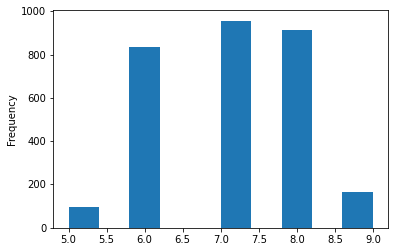

In [ ]:
data["CGPA"].plot.hist()

## Placements stuff

### Placements with Age

Seems like, that ages above 24 are more likely to be placed. (is that the time they graduate or am i being dumb in the sense like "_ah, floor is made out of floor_"??)

In [ ]:
# trying to graph placements with age
import plotly.express as px

px.histogram(data, x="Age", color="PlacedOrNot")
# interesting. so half are not placed in ages 20-22, 
# and from 24-25 we have people who are placed more than who are not

## Relation between Placements & Number of Internships done

In [ ]:
# Trying placements with CGPA

for internship in sorted(data["Internships"].unique()):
    total = data[data["Internships"] == internship]
    no_placed = total[total["PlacedOrNot"] == 1]
    print("Internships done: {} \tChance of being placed: {:.2%}".format(
        internship,
        len(no_placed) / len(total)
        )
    )
print("Do note, sample space for 2-3 internships is low")

px.histogram(data, x="Internships", color="PlacedOrNot")


Internships done: 0 	Chance of being placed: 49.14%
Internships done: 1 	Chance of being placed: 53.65%
Internships done: 2 	Chance of being placed: 80.57%
Internships done: 3 	Chance of being placed: 80.39%
Do note, sample space for 2-3 internships is low


In [ ]:
placed = data["PlacedOrNot"]
Hostel = data['Hostel']
countHostel = 0
countNonHostel = 0
# print(placed[0] == 1 and Hostel[0] == 1)
for i in range(0, len(data), 1):
    if (placed[i] == 1 and Hostel[i] == 1):
        countHostel += 1
    elif (placed[i] == 1 and Hostel[i] == 0):
        countNonHostel += 1
v1 = [x for x in Hostel if x == 1]
v2 = [x for x in Hostel if x == 0]
print("How many hostelers gets placed: ",countHostel, "\nOut of:", len(v1))
print("Average:", countHostel/ len(v1))
print("How many Day Scholers gets placed: ",countNonHostel, "\nOut of:", len(v2))
print("Average", countNonHostel/ len(v2))


print("\n\nIt hardly matters whether you live in hostel or not... \nIt solely depends on students...")

How many hostelers gets placed:  416 
Out of: 798
Average: 0.5213032581453634
How many Day Scholers gets placed:  1223 
Out of: 2168
Average 0.5641143911439115


It hardly matters whether you live in hostel or not... 
It solely depends on students...


In [ ]:
averageCGPA = data['CGPA'].mean()

countAbove = 0
countBelow = 0
for i in range(len(data)):
    if (placed[i] == 1 and data['CGPA'][i] >= averageCGPA):
        countAbove += 1
    elif placed[i] == 1 and data['CGPA'][i] < averageCGPA:
        countBelow += 1

v1 = [x for x in data['CGPA'] if x >= averageCGPA]
v2 = [x for x in data['CGPA'] if x < averageCGPA]
print("Number of students having more than average CGPA and yet placed:",countAbove)
print("Out of:", len(v1), "\nAverage:", countAbove/ len(v1))
print("Number of Students having below average CGPA and yet placed:",countBelow)
print("Out of:", len(v2), "\nAverage:", countBelow/ len(v2))


print("\n\nIt seems we have to get more than average CGPA to increase our chance of getting placed based on the dataset")


Number of students having more than average CGPA and yet placed: 1080
Out of: 1080 
Average: 1.0
Number of Students having below average CGPA and yet placed: 559
Out of: 1886 
Average: 0.2963944856839873


It seems we have to get more than average CGPA to increase our chance of getting placed based on the dataset


In [ ]:
px.histogram(data, x="CGPA", color="PlacedOrNot")

In [ ]:
CGPA = data['CGPA']

count1 = 0
count2 = 0
count3 = 0
count4 = 0

for i in range(len(data)):
    if (Hostel[i] == 1):
        if (CGPA[i] >= averageCGPA):
            count1 += 1
        else:
            count2 += 1
    else:
        if (CGPA[i] >= averageCGPA):
            count3 += 1
        else:
            count4 += 1
# v1 = [x for x in Hostel if x == 1]
# v2 = [x for x in Hostel if x == 0]

print("Total students who stayed in Hostels:", count1 + count2)
print("Get above average CGPA:", count1)
print("Average:", count1/(count1 + count2))
print("Get below average CGPA:", count2)
print("Average:", count2/(count1 + count2))

print("Total Students who do not stay in Hostel:", count3 + count4)
print("Get above average CGPA:", count3)
print("Average:", count3/(count3 + count4))
print("Get below average CGPA:", count4)
print("Average:", count4/(count3 + count4 ))

print("\n\nWhether or not you stay in hostel..\nIt seems CGPA ought to be remain same")
print("Murphy's Law in action")

Total students who stayed in Hostels: 798
Get above average CGPA: 308
Average: 0.38596491228070173
Get below average CGPA: 490
Average: 0.6140350877192983
Total Students who do not stay in Hostel: 2168
Get above average CGPA: 772
Average: 0.35608856088560886
Get below average CGPA: 1396
Average: 0.6439114391143912


Whether or not you stay in hostel..
It seems CGPA ought to be remain same
Murphy's Law in action


In [ ]:
#Which stream has the oldest students who graduates

(data.groupby(
    ['Stream']).max())["Age"]


# print("Age doesnot matter after all")

Stream
Civil                            28
Computer Science                 30
Electrical                       26
Electronics And Communication    26
Information Technology           26
Mechanical                       29
Name: Age, dtype: int64

In [ ]:
temp = data.groupby(["Stream"])
temp.mean()["PlacedOrNot"]



Stream
Civil                            0.460568
Computer Science                 0.582474
Electrical                       0.541916
Electronics And Communication    0.591981
Information Technology           0.591896
Mechanical                       0.471698
Name: PlacedOrNot, dtype: float64

In [ ]:
temp.size()

Stream
Civil                            317
Computer Science                 776
Electrical                       334
Electronics And Communication    424
Information Technology           691
Mechanical                       424
dtype: int64

In [ ]:
temp.median()["PlacedOrNot"]

Stream
Civil                            0
Computer Science                 1
Electrical                       1
Electronics And Communication    1
Information Technology           1
Mechanical                       0
Name: PlacedOrNot, dtype: int64

In [ ]:
px.histogram(data, x="Stream", color="PlacedOrNot")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f8729aa-453a-43fd-a393-208dcb3bfeba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>